In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [6]:
import warnings
warnings.simplefilter('ignore')

In [7]:
# importing libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data file -
df=pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       5398 non-null   object 
 1   type          5398 non-null   object 
 2   title         5397 non-null   object 
 3   director      3515 non-null   object 
 4   cast          4903 non-null   object 
 5   country       4735 non-null   object 
 6   date_added    5397 non-null   object 
 7   release_year  5397 non-null   float64
 8   rating        5397 non-null   object 
 9   duration      5397 non-null   object 
 10  listed_in     5397 non-null   object 
 11  description   5397 non-null   object 
dtypes: float64(1), object(11)
memory usage: 506.2+ KB


(5398, 12)

In [9]:
df.describe()


,release_year
count,5397.000000
mean,2016.083936
std,7.121457
min,1925.000000
25%,2016.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [10]:
df.describe(include='object').T

,count,unique,top,freq
show_id,5398,5398,s1,1
type,5398,3,Movie,3464
title,5397,5397,Dick Johnson Is Dead,1
director,3515,2721,Rajiv Chilaka,17
cast,4903,4749,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",14
country,4735,475,United States,1545
date_added,5397,1177,"July 1, 2021",60
rating,5397,11,TV-MA,2246
duration,5397,208,1 Season,1258
listed_in,5397,430,Stand-Up Comedy,239


In [11]:
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.018525
director        34.883290
cast             9.170063
country         12.282327
date_added       0.018525
release_year     0.018525
rating           0.018525
duration         0.018525
listed_in        0.018525
description      0.018525
dtype: float64

In [12]:
df['type'].value_counts( normalize = True)*100

Movie      64.171916
TV Show    35.809559
TV Sh       0.018525
Name: type, dtype: float64

# ***PERCENTAGE OF MOVIES AND TV SHOWS***

<Axes: ylabel='type'>

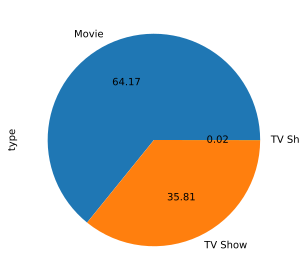

In [13]:
df['type'].value_counts().plot(kind = 'pie', autopct= "%.2f")

# ***SEPARATING THE CASTS OF EACH MOVIE AND TV SHOW***

In [14]:
constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()

In [15]:
df_new=pd.DataFrame(constraint,index=df['title'])
df_new=df_new.stack()
df_new=pd.DataFrame(df_new)
df_new

0
title                                 
Dick Johnson Is Dead 0             nan
Blood & Water        0      Ama Qamata
                     1     Khosi Ngema
                     2   Gail Mabalane
                     3  Thabang Molaba
...                                ...
Lal Patthar          6          Dulari
                     7    Chandramohan
                     8   Sujata Bakshi
                     9        Meena T.
NaN                  0             nan

[40647 rows x 1 columns]

In [16]:
df_new=pd.DataFrame(df_new.reset_index())
df_new.rename(columns={0:'cast'}, inplace=True)
df_new.drop(['level_1'], axis=1, inplace=True)
df_new.head()

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


# ***UN-NESTING THE DIRECTORS COLUMN***

In [17]:
constraint1=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1=pd.DataFrame(constraint1, index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Director'}, inplace=True)
df_new1.drop(['level_1'], axis=1, inplace=True)
df_new1.head()

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [18]:
df_new[df_new['cast']=='Robert Downey Jr.']

,title,cast
7787,Due Date,Robert Downey Jr.
13083,Chef,Robert Downey Jr.


In [19]:
df_new[df_new.cast.str.contains('Rupa')]

,title,cast
313,Chhota Bheem,Rupa Bhimani
708,Mighty Raju,Rupa Bhimani
2108,Pahuna,Rupa Tamang
3373,Chhota Bheem - Dinosaur World,Rupa Bhimani
3379,Chhota Bheem - Neeli Pahaadi,Rupa Bhimani
3386,Chhota Bheem & Ganesh,Rupa Bhimani
3393,Chhota Bheem & Krishna: Mayanagari,Rupa Bhimani
3400,Chhota Bheem & Krishna: Pataliputra- City of t...,Rupa Bhimani
3407,Chhota Bheem And The Broken Amulet,Rupa Bhimani
3414,Chhota Bheem And The Crown of Valhalla,Rupa Bhimani


In [20]:
df_new.cast.value_counts()

nan                  495
Takahiro Sakurai      26
Anupam Kher           25
Rajesh Kava           25
Yuki Kaji             24
                    ... 
Skand Thakur           1
Yukitoshi Kikuchi      1
Ayaka Nanase           1
Neeraj Madhav          1
Meena T.               1
Name: cast, Length: 25689, dtype: int64

In [21]:
df_new1.Director.value_counts()

nan                     1883
Rajiv Chilaka             19
Jan Suter                 15
Suhas Kadav               15
Raúl Campos               14
                        ... 
Christopher Caldwell       1
Michael Kampa              1
Jennifer Westcott          1
Richard Greenberg          1
Sushil Majumdar            1
Name: Director, Length: 2990, dtype: int64

# ***UN-NESTING THE 'LISTED IN' COLUMN***

In [22]:
constraint2=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2, index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Genre'}, inplace=True)
df_new2.drop(['level_1'], axis=1, inplace=True)
df_new2.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


# ***GROUPING BY GENRES***

In [23]:
df_new2.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
                                                                                 ascending=False)

,Genre,title
16,International Movies,1755
12,Dramas,1426
7,Comedies,1025
17,International TV Shows,1000
34,TV Dramas,576
0,Action & Adventure,464
33,TV Comedies,436
24,Romantic Movies,398
10,Documentaries,389
4,Children & Family Movies,377


# ***COUNTING THE NUMBER OF MOVIES/SHOWS IN A SPECIFIC GENRE(COMEDIES IN THIS CASE)***

In [24]:
dfx = df_new2[df_new2['Genre'].isin(['Comedies', 'TV Comedies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows'])]
len(dfx)

1747

# ***UN-NESTING THE COUNTRIES COLUMN***

In [25]:
constraint3=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint3, index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Country'}, inplace=True)
df_new3.drop(['level_1'], axis=1, inplace=True)
df_new3.head(20)

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
5,Midnight Mass,nan
6,My Little Pony: A New Generation,nan
7,Sankofa,United States
8,Sankofa,Ghana
9,Sankofa,Burkina Faso


# ***TOP 5 COUNTRIES WITH MOST RELEASES***

In [26]:
top_cou=df_new3.groupby(['Country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
                                                                                 ascending=False)
top_cou.head(5)

,Country,title
91,United States,1999
98,nan,662
37,India,638
89,United Kingdom,383
44,Japan,244


In [27]:
# merging the unnested director data with unnested cast data
df_new4=df_new1.merge(df_new, on=['title'], how='inner')
# merging the above merged data with unnested genre data
df_new5=df_new4.merge(df_new2, on=['title'], how='inner')
# merging the above merged data with unnested country data
df_prefinal=df_new5.merge(df_new3, on=['title'], how='inner')

# replacing nan values of director and cast by Unknown
df_prefinal['cast'].replace(['nan'], ['Unknown'], inplace=True)
df_prefinal['Director'].replace(['nan'], ['Unknown'], inplace=True)
df_prefinal['Country'].replace(['nan'], [np.nan], inplace=True)

df_prefinal.head()

,title,Director,cast,Genre,Country
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,Documentaries,United States
1,Blood & Water,Unknown,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,Unknown,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,Unknown,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,Unknown,Khosi Ngema,International TV Shows,South Africa


# ***MERGING UN-NESTED DATA WITH ORIGINAL DATA***

In [28]:
# merging our unnested data with the original data
df_final=df_prefinal.merge(df[['show_id', 'type', 'title', 'date_added',
                          'release_year', 'rating', 'duration']],
                          on=['title'], how='left')
df_final.head()

,title,Director,cast,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,Documentaries,United States,s1,Movie,"September 25, 2021",2020.0,PG-13,90 min
1,Blood & Water,Unknown,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons
2,Blood & Water,Unknown,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons
3,Blood & Water,Unknown,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons
4,Blood & Water,Unknown,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons


In [29]:
df_final1=df_final.copy(deep=True)

# ***CHECKING NULLS***

In [30]:
df_final.isna().sum() * 100.00 / df_final.shape[0]

title           0.000807
Director        0.000000
cast            0.000000
Genre           0.000000
Country         8.230858
show_id         0.000000
type            0.000000
date_added      0.000807
release_year    0.000807
rating          0.000807
duration        0.000807
dtype: float64

In [31]:
df_final.dropna(subset=['duration', 'rating', 'release_year'], axis=0, inplace=True)

In [32]:
df_final['Country'].fillna(df_final['Country'].value_counts().idxmax(), inplace=True)

In [33]:
df_final['year_added']=df_final['date_added'].str.split(',', expand=True)[1]
df_final['year_added']

0          2021
1          2021
2          2021
3          2021
4          2021
          ...  
123845     2017
123846     2017
123847     2017
123848     2017
123849     2017
Name: year_added, Length: 123850, dtype: object

# ***creating seperate dataframes for movies & TV shows***

In [34]:
df_shows=df_final[df_final['type']=='TV Show']
df_movies=df_final[df_final['type']=='Movie']

# ***TOP 5 MOVIES RATINGS***

In [35]:
df_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
                                                                                 ascending=False)[:5]

,rating,title
7,TV-MA,1308
5,TV-14,888
4,R,366
8,TV-PG,277
3,PG-13,226


# ***TOP 5 TV SHOW RATINGS***

In [36]:
df_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
                                                                                ascending=False)[:5]

,rating,title
3,TV-MA,938
1,TV-14,485
4,TV-PG,188
5,TV-Y,130
6,TV-Y7,130


# ***PLOTS***

# ***RELEASE OF MOVIES AND TV SHOWS OVER THE YEARS***

<Axes: xlabel='release_year', ylabel='Count'>

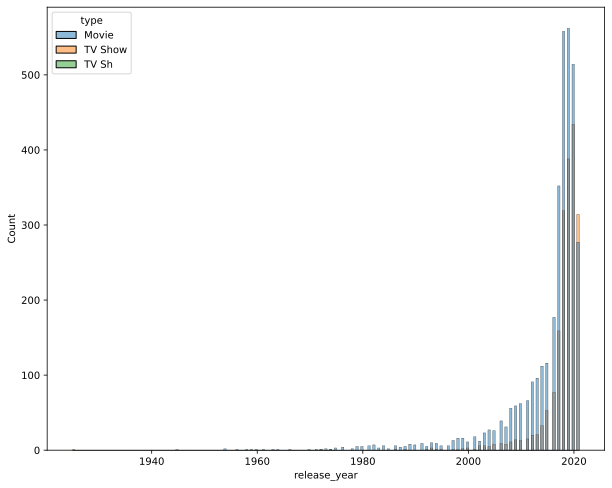

In [37]:
plt.figure(figsize=(10,8))
sns.histplot(x='release_year',hue='type',data=df)

In [38]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [39]:
import plotly.graph_objs as go

# ***GROWTH AND DECLINE OF CONTENT OVER THE YEARS***

In [40]:
d1= df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows")
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies")
data = [trace1, trace2]
layout = go.Layout()
fig = go.Figure(data, layout=layout)
fig.show()

# ***IN WHICH MONTH THE DATA IS ADDED THE MOST?***

In [41]:
col = 'month_added'
vc1 = d1[col].value_counts().reset_index()

vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="green"))
data = [trace1, trace2]

layout = go.Layout()
fig = go.Figure(data, layout=layout)
fig.show()

# ***OLDEST MOVIES ON NETFLIX***

In [42]:
oldm = df.sort_values("release_year", ascending = True)
oldm = oldm[oldm['duration'] != ""]
oldm[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925.0
1331,Five Came Back: The Reference Films,1945.0
2375,The Blazing Sun,1954.0
1699,White Christmas,1954.0
2369,Dark Waters,1956.0
2368,Cairo Station,1958.0
542,Ujala,1959.0
5220,Singapore,1960.0
177,The Guns of Navarone,1961.0
2373,Saladin,1963.0


# ***OLDEST SHOWS***

In [43]:
oldtv = df.sort_values("release_year", ascending = True)
oldtv[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925.0
1331,Five Came Back: The Reference Films,1945.0
2375,The Blazing Sun,1954.0
1699,White Christmas,1954.0
2369,Dark Waters,1956.0
2368,Cairo Station,1958.0
542,Ujala,1959.0
5220,Singapore,1960.0
177,The Guns of Navarone,1961.0
2373,Saladin,1963.0


# ***WHICH ACTOR HAS STARRED IN MOST MOVIES?***

In [44]:
df_cast=df_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_cast=df_cast[df_cast['cast']!='Unknown']
df_cast.head(10)

,cast,title
1420,Anupam Kher,24
7668,Julie Tejwani,21
13275,Rupa Bhimani,20
12490,Rajesh Kava,20
7870,Kareena Kapoor,19
13990,Shah Rukh Khan,19
7032,Jigna Bhardwaj,19
451,Akshay Kumar,18
2211,Boman Irani,18
11628,Om Puri,17


# ***WHICH ACTOR HAS STARRED IN MOST TV SHOWS?***

In [45]:
df_cast=df_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
                                                                                      ascending=False)
df_cast=df_cast[df_cast['cast']!='Unknown']
df_cast.head(10)

,cast,title
10496,Takahiro Sakurai,21
11577,Yuki Kaji,16
5370,Junichi Suwabe,16
210,Ai Kayano,15
2299,Daisuke Ono,15
11502,Yoshimasa Hosoya,14
11562,Yuichi Nakamura,14
5463,Kana Hanazawa,13
11505,Yoshitsugu Matsuoka,13
4035,Hiroshi Kamiya,13


# ***MOST POPULAR MOVIE DIRECTORS***

In [46]:
df_director=df_movies.groupby(['Director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
                                                                                               ascending=False)
df_director=df_director[df_director['Director']!='Unknown']
df_director.head(10)

,Director,title
2055,Rajiv Chilaka,19
2469,Suhas Kadav,15
1034,Jan Suter,15
2097,Raúl Campos,14
406,Cathy Garcia-Molina,12
2759,Youssef Chahine,12
1551,Marcus Raboy,12
1056,Jay Chapman,9
758,Fernando Ayllón,8
1263,Justin G. Dyck,8


# ***Univariate Analysis separately for shows in INDIA***

In [47]:
df_india_shows=df_shows[(df_shows['Country']=='India')]
df_india_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
                                                                                     ascending=False)[:10]

,Genre,title
3,International TV Shows,36
9,TV Comedies,18
10,TV Dramas,17
4,Kids' TV,9
6,Romantic TV Shows,8
2,Docuseries,7
1,Crime TV Shows,5
5,Reality TV,4
0,British TV Shows,3
11,TV Horror,3


In [48]:
df_uk_movies = df_movies[df_movies['Country']=='United Kingdom']
df_ind_movies = df_movies[df_movies['Country']=='India']

df_uk_shows = df_shows[df_shows['Country']=='United Kingdom']
df_ind_shows = df_shows[df_shows['Country']=='India']

# ***BEST ACTOR DIRECTOR PAIR ACROSS INDIA FOR TV SHOWS***

In [49]:
df_ind_shows['Director_Cast_Combination'] = df_ind_shows.cast.str.cat(df_ind_shows.Director, sep=' and ')
df_ind_shows_subset=df_ind_shows[(df_ind_shows['cast']!='Unknown') & (df_ind_shows['Director']!='Unknown')]

df_director_cast=df_ind_shows_subset.groupby(['Director_Cast_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
                                                                                                                               ascending=False)
df_director_cast.head()

,Director_Cast_Combination,title
21,Anjali and Gautham Vasudev Menon,2
185,Prakash Raj and Gautham Vasudev Menon,2
100,Gautham Vasudev Menon and Gautham Vasudev Menon,2
226,Revathy and Arvind Swamy,1
224,Remya Nambeesan and Sarjun,1


# ***BEST ACTOR DIRECTOR PAIR ACROSS UK FOR TV MOVIES***

In [50]:
df_uk_movies['Director_Cast_Combination'] = df_uk_movies.cast.str.cat(df_uk_movies.Director, sep=' and ')
df_uk_movies_subset=df_uk_movies[(df_uk_movies['cast']!='Unknown') & (df_uk_movies['Director']!='Unknown')]

df_director_cast=df_uk_movies_subset.groupby(['Director_Cast_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
                                                                                                                                ascending=False)
df_director_cast.head()

,Director_Cast_Combination,title
744,Joel Courtney and Vince Marcello,3
1447,Simon Greenall and Blair Simmons,3
1099,Molly Ringwald and Vince Marcello,3
751,Joey King and Vince Marcello,3
1317,Rob Rackstraw and Blair Simmons,3


# ***MOST POPULAR GENRES ACROSS ALL COUNTRIES FOR MOVIES AND TV SHOWS***

In [51]:
df_final1.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
                                                                                ascending=False)[:10]

,Genre,title
16,International Movies,1755
12,Dramas,1426
7,Comedies,1025
17,International TV Shows,1000
34,TV Dramas,576
0,Action & Adventure,464
33,TV Comedies,436
24,Romantic Movies,398
10,Documentaries,389
4,Children & Family Movies,377


# ***RECOMMENDATIONS FOR SPECIFIC COUNTRIES BASED ON CONTENT AVAILABLE***

In [52]:
df_usa = df_final1[df_final1['Country']=='United States']
df_ind = df_final1[df_final1['Country']=='India']

In [53]:


df_usa.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
                                                                              ascending=False)[:10]

,rating,title
6,TV-MA,715
3,R,315
4,TV-14,282
2,PG-13,191
7,TV-PG,164
1,PG,96
8,TV-Y,90
9,TV-Y7,82
5,TV-G,51
0,G,13


In [54]:
df_ind.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
                                                                              ascending=False)[:10]

,rating,title
3,TV-14,351
5,TV-MA,180
6,TV-PG,71
8,TV-Y7,10
1,PG-13,8
0,PG,6
4,TV-G,5
7,TV-Y,5
2,R,2
